In [1]:
# Set project directory
import os
import sys

def project_dir():
    notebook_path = %pwd
    repo_name = "nsl_kdd"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)

pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

import time

from data_utils import load_train_test_data
from src.feature_extraction import ClassicalAutoencoder


import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

# Load data

In [3]:
(X_train, X_test, Y_train, Y_test), attack_classes = load_train_test_data(pwd=pwd, return_classes=True, standardize=True, norm=False, include_categorical=False)

In [4]:
X = np.vstack([X_train, X_test])
Y = np.vstack([Y_train, Y_test])
nsl_lables = np.argmax(Y[:], axis=1)

# Utils

In [5]:
def plot_history(history, title=None, ymax=None):
    plt.figure(figsize=(10, 7))
    
    X = np.arange(1, len(history['loss']) + 1)
    
    plt.plot(X, history['loss'], label='train')
    
    if ymax is not None:
        plt.ylim(0, ymax)

    plt.grid()
    plt.legend()
        
    plt.title(title)
    plt.show()

In [9]:
path = pwd + "/src/feature_extraction"
TRAIN_AUTOENCODER = False

# Training

In [7]:
N_BOTTLENECK_LIST = [2, 4, 8, 16]

2
Metal device set to: Apple M1 Pro


2022-05-28 16:21:28.203577: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-28 16:21:28.203715: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-05-28 16:21:28.369216: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-28 16:21:28.531257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  61/4642 [..............................] - ETA: 11s - loss: 0.1662

2022-05-28 16:22:24.056077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4642/4642 [==============================] - 12s 2ms/step - loss: 0.2239
Loss: 0.2239


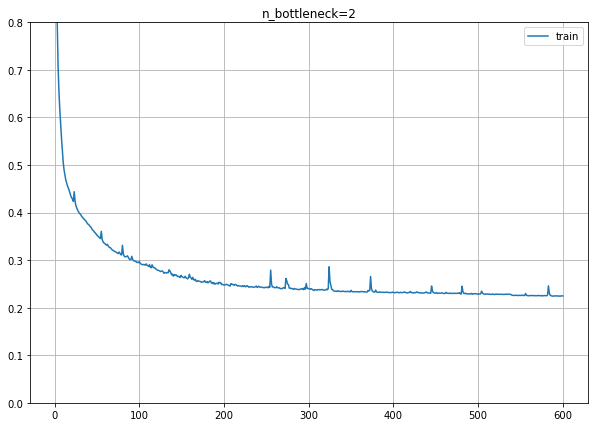

4


2022-05-28 16:22:35.788715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  61/4642 [..............................] - ETA: 11s - loss: 0.0547

2022-05-28 16:23:32.411371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4642/4642 [==============================] - 12s 2ms/step - loss: 0.0633
Loss: 0.0633


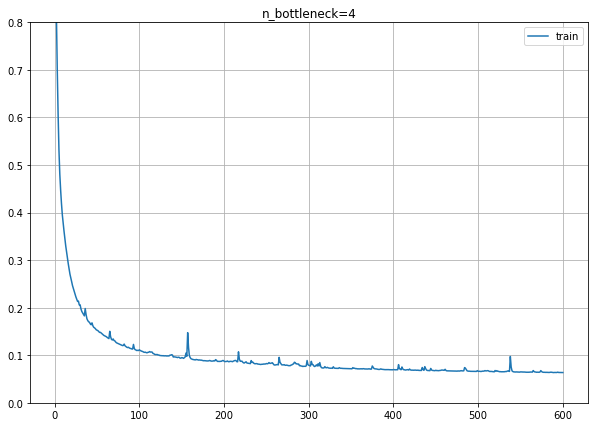

8


2022-05-28 16:23:44.146765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  60/4642 [..............................] - ETA: 11s - loss: 0.0223

2022-05-28 16:24:40.997267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4642/4642 [==============================] - 11s 2ms/step - loss: 0.0234
Loss: 0.0234


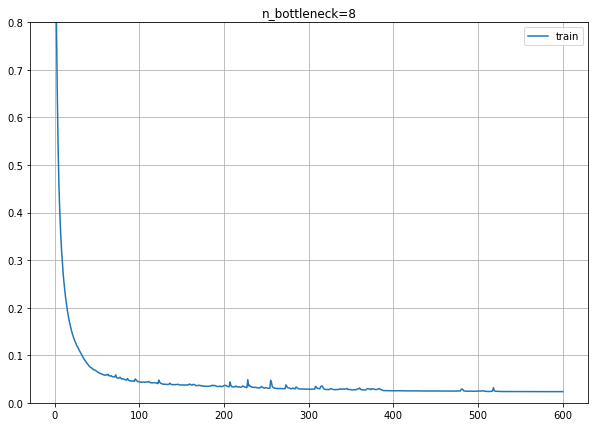

16


2022-05-28 16:24:52.696570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  62/4642 [..............................] - ETA: 11s - loss: 0.0093

2022-05-28 16:25:52.233724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4642/4642 [==============================] - 11s 2ms/step - loss: 0.0111
Loss: 0.0111


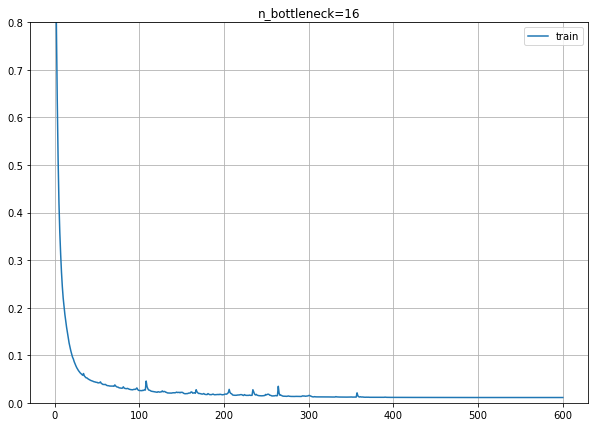

In [8]:
for n_bottleneck in N_BOTTLENECK_LIST:
    print('=============================================================================')
    print(n_bottleneck)
    print('=============================================================================')
    classical_autoencoder = ClassicalAutoencoder(n_bottleneck, root=path)
    
    if TRAIN_AUTOENCODER:
        classical_autoencoder.compile_and_train(X, n_epochs=600, lr=0.002, lr_patience=20, verbose=0)
    else:
        classical_autoencoder.load_weights(load_history=True)
    
    print(f'Loss: {classical_autoencoder.compile_and_evaluate(X):0.4f}')
    plot_history(classical_autoencoder.history, f'n_bottleneck={n_bottleneck}', ymax=0.8)